In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy, matplotlib

from scipy.fftpack import fft, ifft

In [2]:
data = pd.read_csv("E:\\Mine\\Kuliah\\OneDrive - Institut Teknologi Sepuluh Nopember\\SMT 8\\TA\\Ambil Data\\Tama\\tama tengkurap1.csv", names = ['ecg'])
fs = 125

## Plot ECG

In [3]:
data

ecg
0     0.000000
1     0.000000
2     0.004835
3     0.049158
4     0.000000
...        ...
8959  0.438388
8960  0.496410
8961  0.499634
8962  0.461758
8963  0.531868

[8964 rows x 1 columns]

In [4]:
#time = np.array(data["'Elapsed time'"])
sinyal = np.array(data["ecg"])
ndata = len(sinyal)

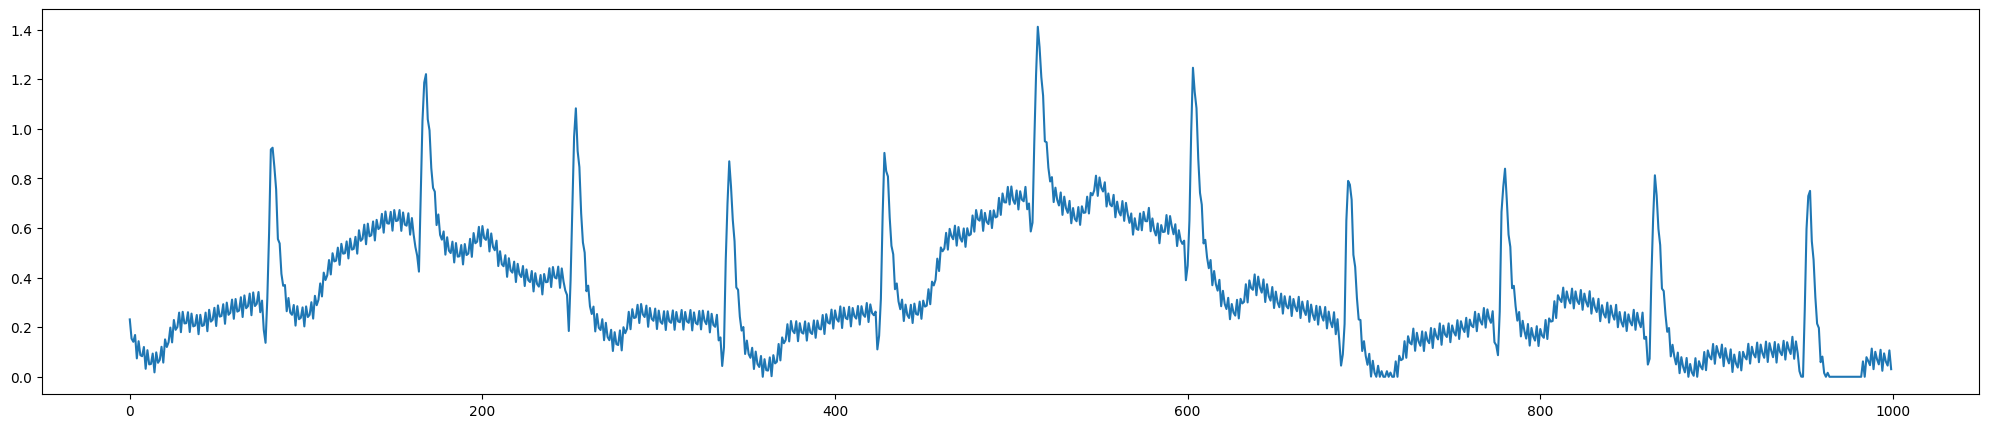

In [5]:
plt.figure(figsize = (25,5))
plt.plot(sinyal[2000:3000])

In [6]:
w2fb1 = np.zeros(ndata)
w2fb2 = np.zeros(ndata)
w2fb3 = np.zeros(ndata)
gradien1 = np.zeros(ndata)
gradien2 = np.zeros(ndata)
gradien3 = np.zeros(ndata)

In [7]:
qj1 = [-2.0, 2.0]
qj2 = [-0.25, -0.75, -0.5, 0.5, 0.75, 0.25]
qj3 = [-0.03125, -0.09375, -0.1875, -0.3125, -0.34375, -0.28125, -0.125, 0.125, 0.28125, 0.34375, 0.3125, 0.1875, 0.09375, 0.03125]

In [8]:
for i in range(ndata):
    w2fb1[i] = qj1[0] * sinyal[i] +  qj1[1] * sinyal[i-1];
    w2fb2[i] = qj2[0] * sinyal[i] +  qj2[1] * sinyal[i-1] +  qj2[2] * sinyal[i-2] +  qj2[3] * sinyal[i-3] +  qj2[4] * sinyal[i-4] +  qj2[5] * sinyal[i-5];
    w2fb3[i] = qj3[0] * sinyal[i] +  qj3[1] * sinyal[i-1] +  qj3[2] * sinyal[i-2] +  qj3[3] * sinyal[i-3] +  qj3[4] * sinyal[i-4] +  qj3[5] * sinyal[i-5] +  qj3[6] * sinyal[i-6] +  qj3[7] * sinyal[i-7] +  qj3[8] * sinyal[i-8] +  qj3[9] * sinyal[i-9] +  qj3[10] * sinyal[i-10] +  qj3[11] * sinyal[i-11] +  qj3[12] * sinyal[i-12] +  qj3[13] * sinyal[i-13];

In [9]:
for i in range(ndata):
    gradien1[i] = w2fb1[i] - w2fb1[i-1]
    gradien2[i] = w2fb2[i] - w2fb2[i-2]
    gradien3[i] = w2fb3[i] - w2fb3[i-3]

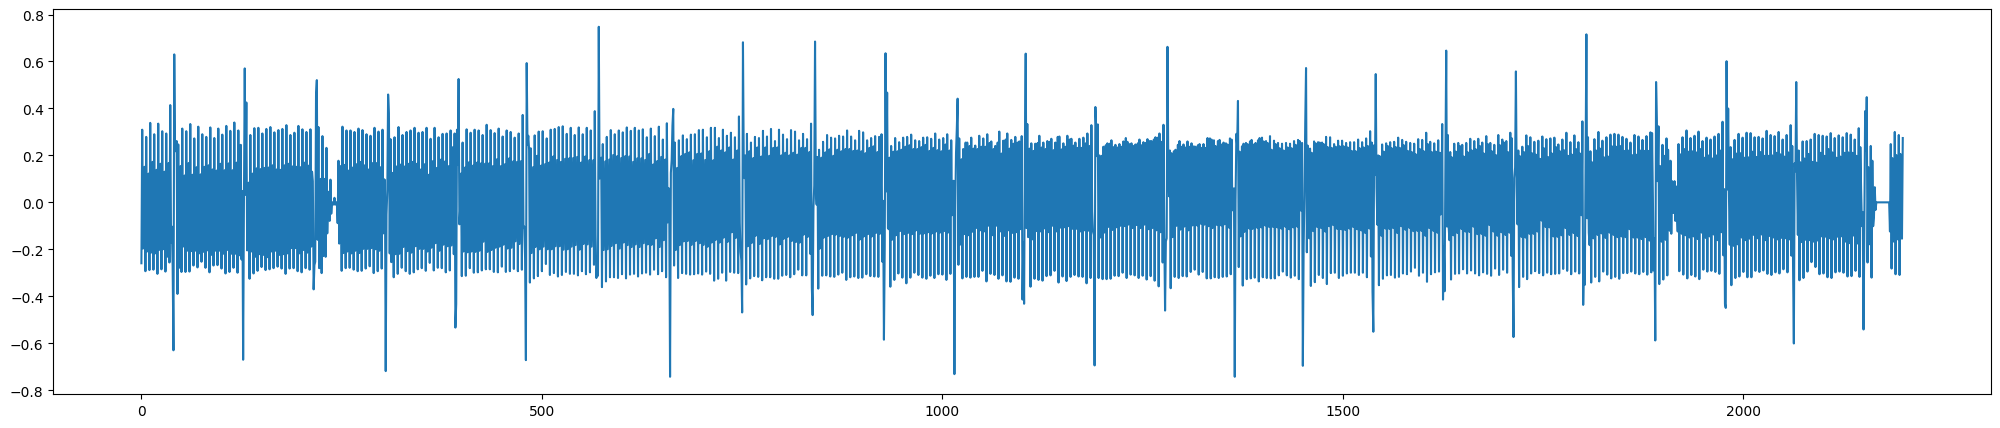

In [10]:
plt.figure(figsize = (25,5))
plt.plot(gradien1[800:3000])

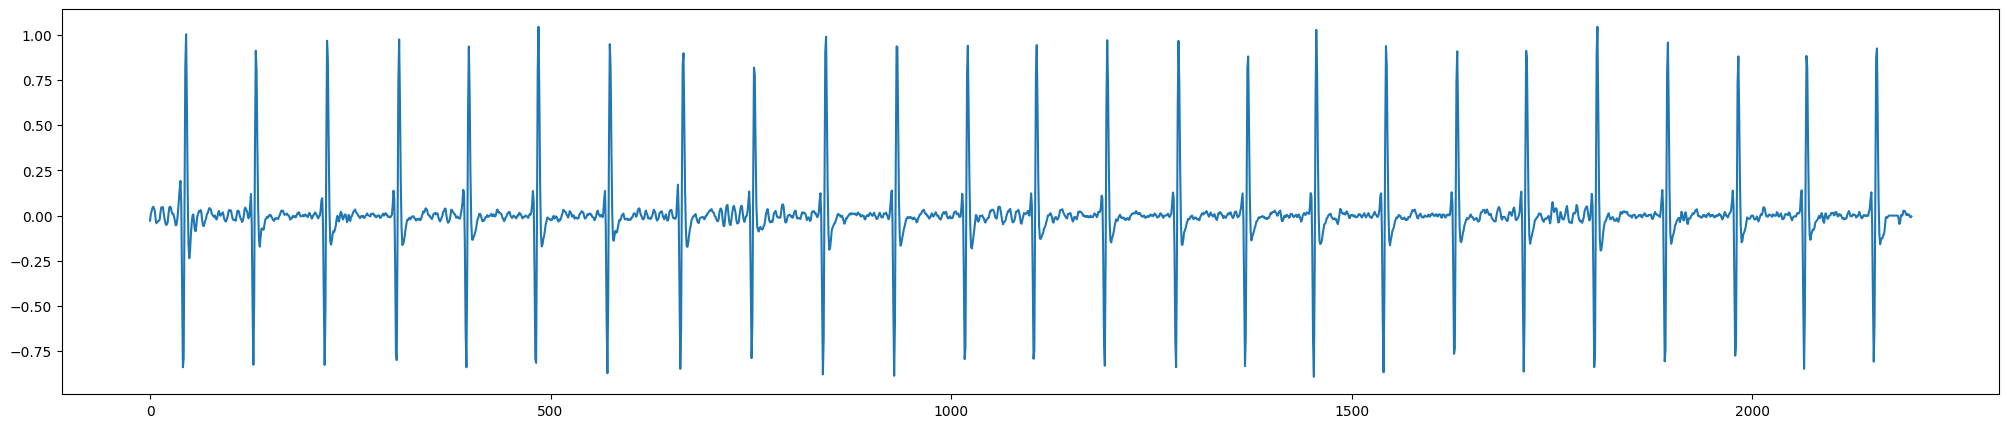

In [11]:
plt.figure(figsize = (25,5))
plt.plot(gradien2[800:3000])

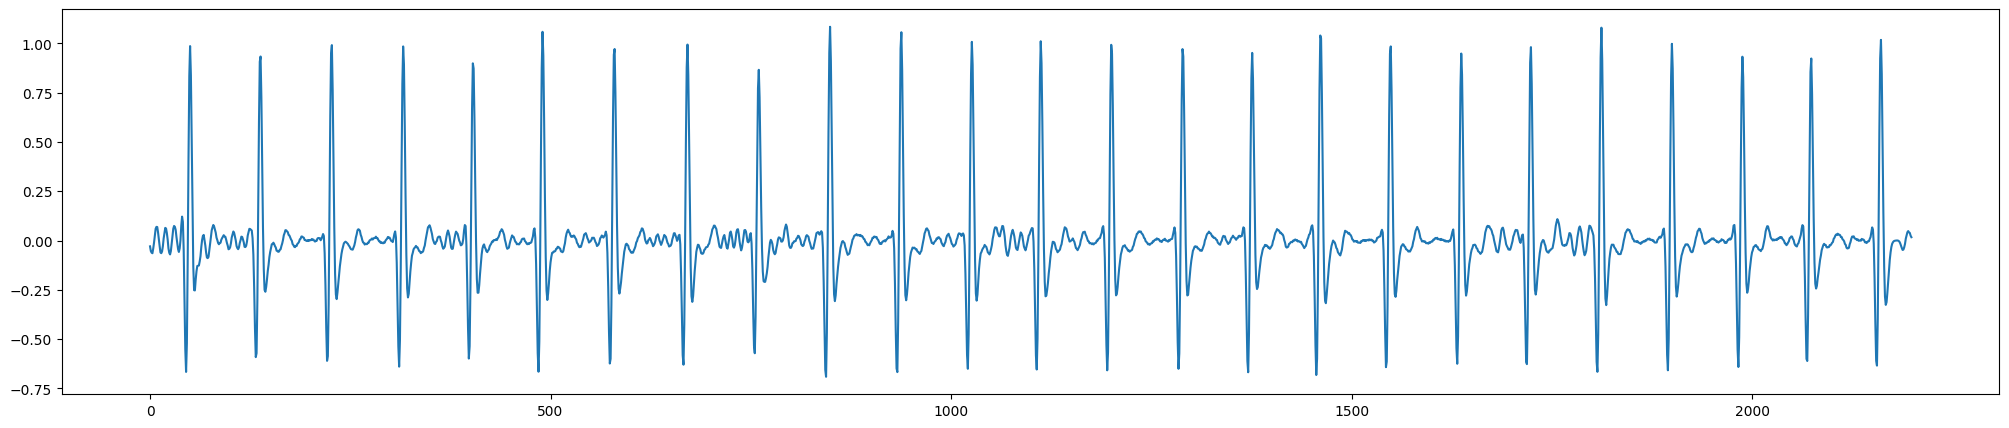

In [12]:
plt.figure(figsize = (25,5))
plt.plot(gradien3[800:3000])

In [13]:
hasil_QRS = np.zeros(ndata)

In [20]:
for i in range(ndata):
    if (gradien1[i] > -0.4 and gradien2[i] > -0.4 and gradien3[i] > 0.4):
        hasil_QRS[i] = 1
    else:
        hasil_QRS[i] = 0

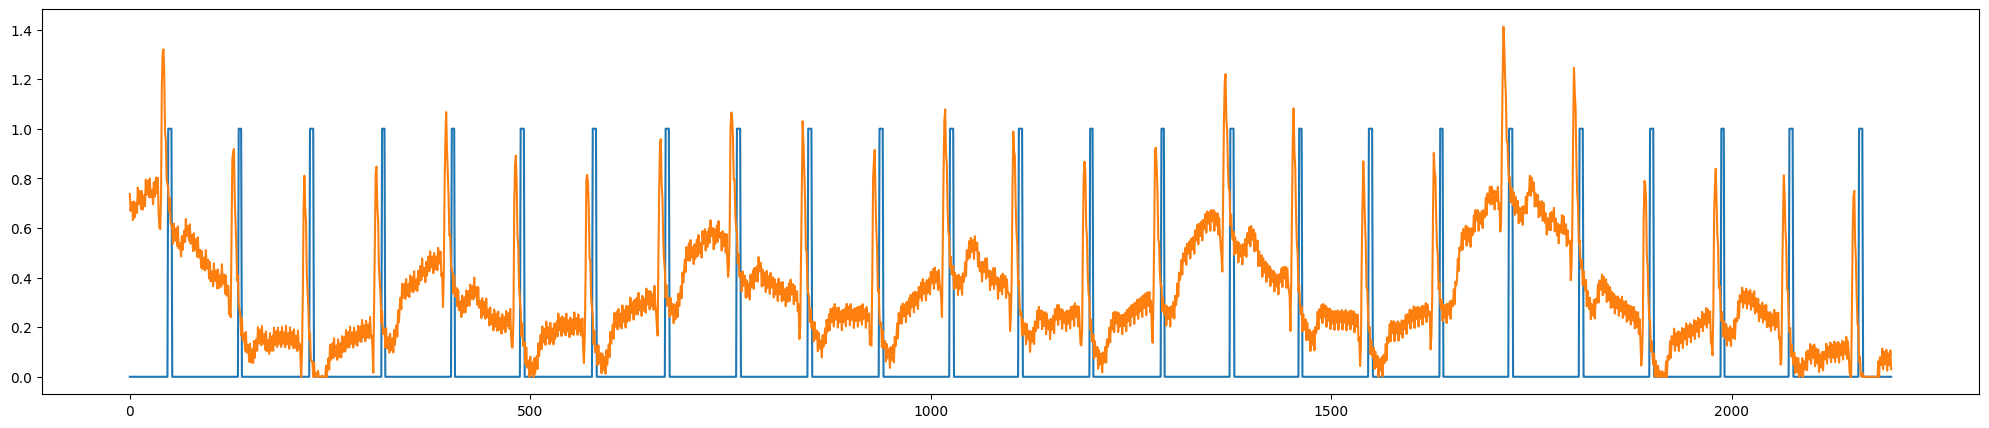

In [21]:
plt.figure(figsize = (25,5))
plt.plot(hasil_QRS[800:3000])
plt.plot(sinyal[800:3000])

In [30]:
k = []
for n in range(ndata-1):
    if hasil_QRS[n] == 0 and hasil_QRS[n+1] == 1:
        k.append(n)

rrinterval = np.zeros(len(k))
bpm = np.zeros(len(k))
for i in range(1, len(k)-1):
    rrinterval[i] = ((k[i]/fs)-(k[i-1]/fs))
    bpm[i] = 60/rrinterval[i]
bpm

array([ 0.        , 87.20930233, 78.94736842, 79.78723404, 83.33333333,
       78.125     , 78.94736842, 80.64516129, 77.31958763, 75.        ,
       74.25742574, 75.75757576, 73.52941176, 75.        , 77.31958763,
       78.125     , 79.78723404, 41.43646409, 86.20689655, 88.23529412,
       92.59259259, 89.28571429, 46.01226994, 93.75      , 91.46341463,
       90.36144578, 88.23529412, 83.33333333, 82.41758242, 79.78723404,
       81.52173913, 82.41758242, 83.33333333, 86.20689655, 88.23529412,
       88.23529412, 85.22727273, 81.52173913, 80.64516129, 80.64516129,
       79.78723404, 80.64516129, 81.52173913, 82.41758242, 83.33333333,
       84.26966292, 79.78723404, 80.64516129, 82.41758242, 82.41758242,
       85.22727273, 87.20930233, 86.20689655, 85.22727273, 81.52173913,
       83.33333333, 82.41758242, 81.52173913, 84.26966292, 82.41758242,
       83.33333333, 86.20689655, 86.20689655,  0.        ])

In [31]:
RR = len(rrinterval)
RR_RMSSD=0
for n in range (2, RR-1):
    RR_RMSSD += ((rrinterval[n]-rrinterval[n-1])**2)

result_rmmsd = np.sqrt(RR_RMSSD/(RR-1))
result_rmmsd

0.1744142123231865

## pvRSA

In [ ]:
rrinterval
plt.figure(figsize = (25,5))
plt.plot(rrinterval[:-1])

In [ ]:
rrinterval

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(bpm[:-1])

In [ ]:
RR_RSA = np.zeros(RR)
rrmin = np.zeros(RR)
for n in range (1, RR):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] < 0 :
        rrmin[n] = rrinterval[n]
rrmin

In [ ]:
rrmin_fix = rrmin[rrmin != 0]
mean_rrmin = np.mean(rrmin_fix)
mean_rrmin cx
# rrmin_fix

In [ ]:
rrmax = np.zeros(RR)
for n in range (len(k)-1):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] > 0 :
        rrmax[n] = rrinterval[n]
rrmax

In [ ]:
rrmax_fix = rrmax[rrmax != 0]
mean_rrmax = np.mean(rrmax_fix)
mean_rrmax

In [ ]:
pvrsa = mean_rrmax - mean_rrmin
pvrsa

## pvRSA 2

In [ ]:
rrmin1 = np.zeros(len(k))
for n in range (len(k)-1):
    if rrinterval[n] < 0.99 :
        rrmin1[n] = rrinterval[n]
rrmin1

In [ ]:
rrmin_fix = rrmin1[rrmin1 != 0]
mean_rrmin1 = np.mean(rrmin_fix)
mean_rrmin1

In [ ]:
rrmax1 = np.zeros(RR)
for n in range (1, RR):
    if rrinterval[n] > 0.99 :
        rrmax1[n] = rrinterval[n]
rrmax1

In [ ]:
rrmax_fix = rrmax1[rrmax1 != 0]
mean_rrmax1 = np.mean(rrmax_fix)
mean_rrmax1

In [ ]:
pvrsa1 = mean_rrmax1 - mean_rrmin1
pvrsa1